#### Importing Libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta,date
import datetime as dt
from sklearn.ensemble import RandomForestRegressor

### Data reading
---

In [178]:
dataframe = pd.read_csv("C:\program1\\practise1806095.csv")

In [179]:
dataframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200760666,KEHE corp,2019-11-08 00:00:00,2019.0,1.930019e+09,2019-10-18,20191016,20191018,20191102.0,USD,RV,1.0,NaN,5501.96,20191018.0,NAA8,1.930019e+09,0
1,U001,0200331749,SYSC in,2019-11-27 00:00:00,2019.0,1.930133e+09,2019-11-09,20191109,20191109,20191124.0,USD,RV,1.0,NaN,24996.85,20191109.0,NAA8,1.930133e+09,0
2,U001,0200955827,KE corporation,2019-05-10 00:00:00,2019.0,1.929187e+09,2019-04-23,20190422,20190423,20190508.0,USD,RV,1.0,NaN,6470.50,20190423.0,NAA8,1.929187e+09,0
3,U001,0100050364,SING foundation,2019-07-23 00:00:00,2019.0,1.929584e+09,2019-07-08,20190706,20190708,20190723.0,USD,RV,1.0,NaN,21793.39,20190708.0,NAA8,1.929584e+09,0
4,U001,0200466603,SMITH'S trust,2019-04-02 00:00:00,2019.0,1.928982e+09,2019-03-18,20190318,20190318,20190402.0,USD,RV,1.0,NaN,50288.53,20190318.0,NAA8,1.928982e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930830e+09,2020-04-26,20200427,20200426,20200511.0,USD,RV,1.0,NaN,39455.88,20200426.0,NAH4,1.930830e+09,1
49996,U001,200772670,ASSOCIAT llc,NaN,2020.0,1.930707e+09,2020-03-26,20200327,20200326,20200410.0,USD,RV,1.0,NaN,110419.97,20200326.0,NAU5,1.930707e+09,1
49997,U001,0200786288,FAMILY associates,NaN,2020.0,1.930646e+09,2020-03-13,20200313,20200313,20200328.0,USD,RV,1.0,NaN,13974.93,20200313.0,NAA8,1.930646e+09,1
49998,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930624e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,NaN,46703.39,20200309.0,NAH4,1.930624e+09,1


In [180]:
# Head and Tail of Dataframe
dataframe.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200760666,KEHE corp,2019-11-08 00:00:00,2019.0,1.930019e+09,2019-10-18,20191016,20191018,20191102.0,USD,RV,1.0,NaN,5501.96,20191018.0,NAA8,1.930019e+09,0
1,U001,0200331749,SYSC in,2019-11-27 00:00:00,2019.0,1.930133e+09,2019-11-09,20191109,20191109,20191124.0,USD,RV,1.0,NaN,24996.85,20191109.0,NAA8,1.930133e+09,0
2,U001,0200955827,KE corporation,2019-05-10 00:00:00,2019.0,1.929187e+09,2019-04-23,20190422,20190423,20190508.0,USD,RV,1.0,NaN,6470.50,20190423.0,NAA8,1.929187e+09,0
3,U001,0100050364,SING foundation,2019-07-23 00:00:00,2019.0,1.929584e+09,2019-07-08,20190706,20190708,20190723.0,USD,RV,1.0,NaN,21793.39,20190708.0,NAA8,1.929584e+09,0
4,U001,0200466603,SMITH'S trust,2019-04-02 00:00:00,2019.0,1.928982e+09,2019-03-18,20190318,20190318,20190402.0,USD,RV,1.0,NaN,50288.53,20190318.0,NAA8,1.928982e+09,0


In [181]:
dataframe.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930830e+09,2020-04-26,20200427,20200426,20200511.0,USD,RV,1.0,NaN,39455.88,20200426.0,NAH4,1.930830e+09,1
49996,U001,200772670,ASSOCIAT llc,NaN,2020.0,1.930707e+09,2020-03-26,20200327,20200326,20200410.0,USD,RV,1.0,NaN,110419.97,20200326.0,NAU5,1.930707e+09,1
49997,U001,0200786288,FAMILY associates,NaN,2020.0,1.930646e+09,2020-03-13,20200313,20200313,20200328.0,USD,RV,1.0,NaN,13974.93,20200313.0,NAA8,1.930646e+09,1
49998,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930624e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,NaN,46703.39,20200309.0,NAH4,1.930624e+09,1
49999,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930779e+09,2020-04-13,20200411,20200413,20200428.0,USD,RV,1.0,NaN,3524.32,20200413.0,NAH4,1.930779e+09,1


In [182]:
# Let's go through columns name for once
dataframe.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [183]:
#Creating a Copy of DataFrame
df=dataframe.copy()

#### Extraction of data on the basis of Null Clear date into another data frame:-

In [184]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3270
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

- It can be seen that clear_date has 3270 Null values which can be used later for getting result from data.

In [185]:
# Storing clear_date null data to external dataframe
ext_data=df[df.clear_date.isnull()]
ext_data.reset_index(inplace = True,drop=True)
ext_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930707e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,7636.99,20200327.0,NAH4,1.930707e+09,1
1,U001,0200759878,SA foundation,NaN,2020.0,1.930732e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,NaN,14814.54,20200403.0,NAH4,1.930732e+09,1
2,U001,200799367,MCL in,NaN,2020.0,1.930646e+09,2020-03-17,20200312,20200317,20200401.0,USD,RV,1.0,NaN,16625.03,20200317.0,NAA8,1.930646e+09,1
3,U001,0200555117,BURR corp,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,NaN,105738.73,20200403.0,NAA8,1.930738e+09,1
4,U001,0200749225,SUPER systems,NaN,2020.0,1.930681e+09,2020-03-23,20200321,20200323,20200407.0,USD,RV,1.0,NaN,58179.56,20200323.0,NAA8,1.930681e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930830e+09,2020-04-26,20200427,20200426,20200511.0,USD,RV,1.0,NaN,39455.88,20200426.0,NAH4,1.930830e+09,1
3266,U001,200772670,ASSOCIAT llc,NaN,2020.0,1.930707e+09,2020-03-26,20200327,20200326,20200410.0,USD,RV,1.0,NaN,110419.97,20200326.0,NAU5,1.930707e+09,1
3267,U001,0200786288,FAMILY associates,NaN,2020.0,1.930646e+09,2020-03-13,20200313,20200313,20200328.0,USD,RV,1.0,NaN,13974.93,20200313.0,NAA8,1.930646e+09,1
3268,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930624e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,NaN,46703.39,20200309.0,NAH4,1.930624e+09,1


- Dropping these rows from main dataframe which will be used further

In [186]:
df.drop(df[df.clear_date.isnull()].index,axis=0,inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200760666,KEHE corp,2019-11-08 00:00:00,2019.0,1.930019e+09,2019-10-18,20191016,20191018,20191102.0,USD,RV,1.0,NaN,5501.96,20191018.0,NAA8,1.930019e+09,0
1,U001,0200331749,SYSC in,2019-11-27 00:00:00,2019.0,1.930133e+09,2019-11-09,20191109,20191109,20191124.0,USD,RV,1.0,NaN,24996.85,20191109.0,NAA8,1.930133e+09,0
2,U001,0200955827,KE corporation,2019-05-10 00:00:00,2019.0,1.929187e+09,2019-04-23,20190422,20190423,20190508.0,USD,RV,1.0,NaN,6470.50,20190423.0,NAA8,1.929187e+09,0
3,U001,0100050364,SING foundation,2019-07-23 00:00:00,2019.0,1.929584e+09,2019-07-08,20190706,20190708,20190723.0,USD,RV,1.0,NaN,21793.39,20190708.0,NAA8,1.929584e+09,0
4,U001,0200466603,SMITH'S trust,2019-04-02 00:00:00,2019.0,1.928982e+09,2019-03-18,20190318,20190318,20190402.0,USD,RV,1.0,NaN,50288.53,20190318.0,NAA8,1.928982e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46725,U001,0200714710,SYSCO associates,2020-01-31 00:00:00,2020.0,1.930391e+09,2020-01-14,20200112,20200114,20200129.0,USD,RV,1.0,NaN,33633.35,20200114.0,NAA8,1.930391e+09,0
46726,U001,0200769623,WAL-MAR foundation,2019-06-10 00:00:00,2019.0,1.929400e+09,2019-05-29,20190529,20190529,20190613.0,USD,RV,1.0,NaN,21143.81,20190529.0,NAH4,1.929400e+09,0
46727,U001,0200726979,BJ'S us,2019-08-16 00:00:00,2019.0,1.929682e+09,2019-08-01,20190731,20190801,20190816.0,USD,RV,1.0,NaN,288.15,20190801.0,NAA8,1.929682e+09,0
46728,U001,0200707822,PUBLI,2020-01-29 00:00:00,2020.0,1.930401e+09,2020-01-14,20200115,20200114,20200129.0,USD,RV,1.0,NaN,116648.24,20200114.0,NAA8,1.930401e+09,0


###  Basic data preprocessing before splitting


#### Check for remaining Null Values (Null Imputation)

In [187]:
df.shape

(46730, 19)

In [188]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             46730
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

<AxesSubplot:>

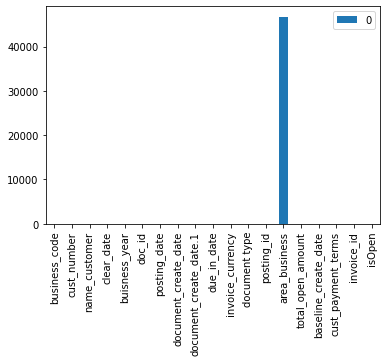

In [192]:
null_value_left=df.isnull().sum()
null_df=pd.DataFrame(null_value_left)
null_df.plot(kind='bar')

- We can infer from above that area_business have completely null values which is clearly not much useful. So,need to remove them. 

In [193]:
df.drop('area_business',axis=1,inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200760666,KEHE corp,2019-11-08 00:00:00,2019.0,1.930019e+09,2019-10-18,20191016,20191018,20191102.0,USD,RV,1.0,5501.96,20191018.0,NAA8,1.930019e+09,0
1,U001,0200331749,SYSC in,2019-11-27 00:00:00,2019.0,1.930133e+09,2019-11-09,20191109,20191109,20191124.0,USD,RV,1.0,24996.85,20191109.0,NAA8,1.930133e+09,0
2,U001,0200955827,KE corporation,2019-05-10 00:00:00,2019.0,1.929187e+09,2019-04-23,20190422,20190423,20190508.0,USD,RV,1.0,6470.50,20190423.0,NAA8,1.929187e+09,0
3,U001,0100050364,SING foundation,2019-07-23 00:00:00,2019.0,1.929584e+09,2019-07-08,20190706,20190708,20190723.0,USD,RV,1.0,21793.39,20190708.0,NAA8,1.929584e+09,0
4,U001,0200466603,SMITH'S trust,2019-04-02 00:00:00,2019.0,1.928982e+09,2019-03-18,20190318,20190318,20190402.0,USD,RV,1.0,50288.53,20190318.0,NAA8,1.928982e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46725,U001,0200714710,SYSCO associates,2020-01-31 00:00:00,2020.0,1.930391e+09,2020-01-14,20200112,20200114,20200129.0,USD,RV,1.0,33633.35,20200114.0,NAA8,1.930391e+09,0
46726,U001,0200769623,WAL-MAR foundation,2019-06-10 00:00:00,2019.0,1.929400e+09,2019-05-29,20190529,20190529,20190613.0,USD,RV,1.0,21143.81,20190529.0,NAH4,1.929400e+09,0
46727,U001,0200726979,BJ'S us,2019-08-16 00:00:00,2019.0,1.929682e+09,2019-08-01,20190731,20190801,20190816.0,USD,RV,1.0,288.15,20190801.0,NAA8,1.929682e+09,0
46728,U001,0200707822,PUBLI,2020-01-29 00:00:00,2020.0,1.930401e+09,2020-01-14,20200115,20200114,20200129.0,USD,RV,1.0,116648.24,20200114.0,NAA8,1.930401e+09,0


In [194]:
# Also there's 6 values in ""invoice_id"" which is null so let's explore these and see if need to remove or not.

df[df.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2057,CA02,0140104409,LOB systems,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190207,20190217.0,CAD,X2,1.0,16857.72,20190207.0,CA10,NaN,0
3617,CA02,0100030194,AMAZO co,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190305,20190315.0,CAD,X2,1.0,773.80,20190305.0,CA10,NaN,0
10235,CA02,0100054173,DIA corporation,2019-09-25 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20181221,20181231.0,CAD,X2,1.0,255.00,20181221.0,CA10,NaN,0
28087,CA02,0140104409,LOB systems,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190327,20190406.0,CAD,X2,1.0,2635.20,20190327.0,CA10,NaN,0
31881,CA02,0140104409,LOB us,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20181126,20181206.0,CAD,X2,1.0,420.40,20181126.0,CA10,NaN,0
40739,CA02,0140104409,LOB associates,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190131,20190210.0,CAD,X2,1.0,20472.48,20190131.0,CA10,NaN,0


We can infer some points from above like these belong to same business_code and have same payment terms but for now we'll keep this and if needed we'll remove later.

### Check for Constant columns

In [195]:
df.nunique()

business_code                 6
cust_number                1426
name_customer              4248
clear_date                  408
buisness_year                 2
doc_id                    46730
posting_date                423
document_create_date        428
document_create_date.1      425
due_in_date                 495
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         42240
baseline_create_date        433
cust_payment_terms           73
invoice_id                46724
isOpen                        1
dtype: int64

In [196]:
""" We can easily see from abover infer that posting_id and
    isOpen is constant and needed to remove as they are just redundant"""

df.drop(['posting_id','isOpen'],axis=1,inplace=True)

### DateTime Formatting:

In [197]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['buisness_year'] = df['buisness_year'].astype(int)

In [198]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200760666,KEHE corp,2019-11-08,2019,1.930019e+09,2019-10-18,2019-10-16,2019-10-18,2019-11-02,USD,RV,5501.96,2019-10-18,NAA8,1.930019e+09
1,U001,0200331749,SYSC in,2019-11-27,2019,1.930133e+09,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,RV,24996.85,2019-11-09,NAA8,1.930133e+09
2,U001,0200955827,KE corporation,2019-05-10,2019,1.929187e+09,2019-04-23,2019-04-22,2019-04-23,2019-05-08,USD,RV,6470.50,2019-04-23,NAA8,1.929187e+09
3,U001,0100050364,SING foundation,2019-07-23,2019,1.929584e+09,2019-07-08,2019-07-06,2019-07-08,2019-07-23,USD,RV,21793.39,2019-07-08,NAA8,1.929584e+09
4,U001,0200466603,SMITH'S trust,2019-04-02,2019,1.928982e+09,2019-03-18,2019-03-18,2019-03-18,2019-04-02,USD,RV,50288.53,2019-03-18,NAA8,1.928982e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46725,U001,0200714710,SYSCO associates,2020-01-31,2020,1.930391e+09,2020-01-14,2020-01-12,2020-01-14,2020-01-29,USD,RV,33633.35,2020-01-14,NAA8,1.930391e+09
46726,U001,0200769623,WAL-MAR foundation,2019-06-10,2019,1.929400e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,21143.81,2019-05-29,NAH4,1.929400e+09
46727,U001,0200726979,BJ'S us,2019-08-16,2019,1.929682e+09,2019-08-01,2019-07-31,2019-08-01,2019-08-16,USD,RV,288.15,2019-08-01,NAA8,1.929682e+09
46728,U001,0200707822,PUBLI,2020-01-29,2020,1.930401e+09,2020-01-14,2020-01-15,2020-01-14,2020-01-29,USD,RV,116648.24,2020-01-14,NAA8,1.930401e+09


In [199]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int32
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
dtype: object

- We can easily infer from above that so far we'have converted all the columns into datetime format.

### Check for anomolies within Data on datetime columns

 doc create date <= posting date <= baseline date < due date <= clearing date.
   - DataFrame should be in this above order apart from these cases everything else is an anomaly and should be removed.

In [200]:
anomoly_1=(df['document_create_date.1']>df['posting_date']).sum()
anomoly_1

0

In [201]:
anomoly_2=(df['document_create_date.1']>df['due_in_date']).sum()
print('count: ',anomoly_2,'\n''percentage of data: ',(anomoly_2/df.shape[0])*100)

count:  112 
percentage of data:  0.23967472715600258


In [202]:
anomoly_3=(df['document_create_date.1']>df['clear_date']).sum()
anomoly_3

0

In [203]:
anomoly_4=(df['baseline_create_date']>=df['due_in_date']).sum()
print('count: ',anomoly_4,'\n''percentage of data: ',(anomoly_4/df.shape[0])*100)

count:  717 
percentage of data:  1.5343462443826237


In [204]:
anomoly_5=(df['baseline_create_date']>df['clear_date']).sum()
print('count: ',anomoly_5,'\n''percentage of data: ',(anomoly_5/df.shape[0])*100)

count:  5 
percentage of data:  0.010699764605178685


In [205]:
anomoly_6=(df['posting_date']>df['baseline_create_date'])
print('count: ',anomoly_6.sum(),'\n''percentage of data: ',(anomoly_6.sum()/df.shape[0])*100)

count:  2052 
percentage of data:  4.391183393965332


In [206]:
anomoly_7=(df['posting_date']>df['due_in_date']).sum()
print('count: ',anomoly_7,'\n''percentage of data: ',(anomoly_7/df.shape[0])*100)

count:  117 
percentage of data:  0.25037449176118126


 - Above are some cases of anomolies and needed to remove them. We can see that except of anomoly_6 and anomoly_4, no one is making much effect to dataset so i am going to handle only that too for now.

In [207]:
# These are the rows which needed to get removed.!
df[anomoly_6].sample(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
11816,U001,0200002965,DECA in,2019-06-17,2019,1.929450e+09,2019-06-07,2019-06-07,2019-06-07,2019-06-24,USD,RV,4602.00,2019-06-01,NAM4,1.929450e+09
7635,U001,0200020431,DEC llc,2019-12-10,2019,1.930216e+09,2019-12-04,2019-12-04,2019-12-04,2019-12-08,USD,RV,7950.18,2019-12-01,NAM1,1.930216e+09
27448,U001,0200803720,DEC corp,2019-11-08,2019,1.930119e+09,2019-11-07,2019-11-07,2019-11-07,2019-11-11,USD,RV,11446.67,2019-11-01,NAM2,1.930119e+09
25180,U001,0200416837,DEC systems,2019-03-25,2019,1.928998e+09,2019-03-20,2019-03-20,2019-03-20,2019-03-26,USD,RV,15266.89,2019-03-16,NAM2,1.928998e+09
11345,U001,0200020431,DEC corporation,2019-04-01,2019,1.928995e+09,2019-03-20,2019-03-20,2019-03-20,2019-04-08,USD,RV,328.92,2019-03-16,NAM4,1.928995e+09
27896,U001,0200416837,DEC associates,2019-03-25,2019,1.928998e+09,2019-03-20,2019-03-20,2019-03-20,2019-03-23,USD,RV,572.94,2019-03-16,NAM1,1.928998e+09
29158,U001,0200416837,DEC trust,2019-02-01,2019,1.928698e+09,2019-01-28,2019-01-28,2019-01-28,2019-02-08,USD,RV,650.04,2019-01-16,NAM4,1.928698e+09
41254,U001,0200230690,DECA llc,2019-02-13,2019,1.928759e+09,2019-02-07,2019-02-07,2019-02-07,2019-02-11,USD,RV,6473.08,2019-02-01,NAM2,1.928759e+09
45178,CA02,0140105686,SYSC corporation,2019-08-13,2019,2.960561e+09,2019-07-29,2019-07-29,2019-07-29,2019-07-28,CAD,RV,2257.00,2019-07-18,CA10,2.960561e+09
25692,U001,0200020431,DEC systems,2019-02-13,2019,1.928763e+09,2019-02-08,2019-02-08,2019-02-08,2019-02-08,USD,RV,30102.73,2019-02-01,NAM1,1.928763e+09


In [208]:
# Get the index of the rows
index_of_anomoly6 = df[anomoly_6].index

# Remove these index from dataframe(df)
df.drop(index_of_anomoly6,inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200760666,KEHE corp,2019-11-08,2019,1.930019e+09,2019-10-18,2019-10-16,2019-10-18,2019-11-02,USD,RV,5501.96,2019-10-18,NAA8,1.930019e+09
1,U001,0200331749,SYSC in,2019-11-27,2019,1.930133e+09,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,RV,24996.85,2019-11-09,NAA8,1.930133e+09
2,U001,0200955827,KE corporation,2019-05-10,2019,1.929187e+09,2019-04-23,2019-04-22,2019-04-23,2019-05-08,USD,RV,6470.50,2019-04-23,NAA8,1.929187e+09
3,U001,0100050364,SING foundation,2019-07-23,2019,1.929584e+09,2019-07-08,2019-07-06,2019-07-08,2019-07-23,USD,RV,21793.39,2019-07-08,NAA8,1.929584e+09
4,U001,0200466603,SMITH'S trust,2019-04-02,2019,1.928982e+09,2019-03-18,2019-03-18,2019-03-18,2019-04-02,USD,RV,50288.53,2019-03-18,NAA8,1.928982e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46725,U001,0200714710,SYSCO associates,2020-01-31,2020,1.930391e+09,2020-01-14,2020-01-12,2020-01-14,2020-01-29,USD,RV,33633.35,2020-01-14,NAA8,1.930391e+09
46726,U001,0200769623,WAL-MAR foundation,2019-06-10,2019,1.929400e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,21143.81,2019-05-29,NAH4,1.929400e+09
46727,U001,0200726979,BJ'S us,2019-08-16,2019,1.929682e+09,2019-08-01,2019-07-31,2019-08-01,2019-08-16,USD,RV,288.15,2019-08-01,NAA8,1.929682e+09
46728,U001,0200707822,PUBLI,2020-01-29,2020,1.930401e+09,2020-01-14,2020-01-15,2020-01-14,2020-01-29,USD,RV,116648.24,2020-01-14,NAA8,1.930401e+09


- Till now we have removed the anomoly_6 let's check how many anomoly_4 are left and if there's any let's remove them too.!

In [209]:
anomoly_4=(df['baseline_create_date']>=df['due_in_date'])
print('count: ',anomoly_4.sum(),'\n''percentage of data: ',(anomoly_4.sum()/df.shape[0])*100)

count:  717 
percentage of data:  1.604816688302968


In [210]:
# Get the index of the rows
index_of_anomoly4 = df[anomoly_4].index

# Remove these index from dataframe(df)
df.drop(index_of_anomoly4,inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200760666,KEHE corp,2019-11-08,2019,1.930019e+09,2019-10-18,2019-10-16,2019-10-18,2019-11-02,USD,RV,5501.96,2019-10-18,NAA8,1.930019e+09
1,U001,0200331749,SYSC in,2019-11-27,2019,1.930133e+09,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,RV,24996.85,2019-11-09,NAA8,1.930133e+09
2,U001,0200955827,KE corporation,2019-05-10,2019,1.929187e+09,2019-04-23,2019-04-22,2019-04-23,2019-05-08,USD,RV,6470.50,2019-04-23,NAA8,1.929187e+09
3,U001,0100050364,SING foundation,2019-07-23,2019,1.929584e+09,2019-07-08,2019-07-06,2019-07-08,2019-07-23,USD,RV,21793.39,2019-07-08,NAA8,1.929584e+09
4,U001,0200466603,SMITH'S trust,2019-04-02,2019,1.928982e+09,2019-03-18,2019-03-18,2019-03-18,2019-04-02,USD,RV,50288.53,2019-03-18,NAA8,1.928982e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46725,U001,0200714710,SYSCO associates,2020-01-31,2020,1.930391e+09,2020-01-14,2020-01-12,2020-01-14,2020-01-29,USD,RV,33633.35,2020-01-14,NAA8,1.930391e+09
46726,U001,0200769623,WAL-MAR foundation,2019-06-10,2019,1.929400e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,21143.81,2019-05-29,NAH4,1.929400e+09
46727,U001,0200726979,BJ'S us,2019-08-16,2019,1.929682e+09,2019-08-01,2019-07-31,2019-08-01,2019-08-16,USD,RV,288.15,2019-08-01,NAA8,1.929682e+09
46728,U001,0200707822,PUBLI,2020-01-29,2020,1.930401e+09,2020-01-14,2020-01-15,2020-01-14,2020-01-29,USD,RV,116648.24,2020-01-14,NAA8,1.930401e+09


- So far we have removed unnecessary columns and irregualr rows on basis of data.!
- Before going forward to split let's check once again if something still needed to be done
---

Let's go through the description,data_types, and unique_values of each columns

In [212]:
df.nunique()

business_code                 6
cust_number                1377
name_customer              4161
clear_date                  407
buisness_year                 2
doc_id                    43961
posting_date                421
document_create_date        426
document_create_date.1      421
due_in_date                 485
invoice_currency              2
document type                 1
total_open_amount         39751
baseline_create_date        428
cust_payment_terms           53
invoice_id                43961
dtype: int64

- One thing we can notice here is after removing the anomalies, document_type get reduced to 1 which was originally of 2 unique values.So , let's remove that too as it has become constant column.

- Second thing is that we can see invoice_currency have only two unique values so maybe we can drop it too after modifying the total_open_amount as per requirmnets.

In [213]:
df.drop('document type',axis=1,inplace=True)

USD    40230
CAD     3731
Name: invoice_currency, dtype: int64


<AxesSubplot:ylabel='invoice_currency'>

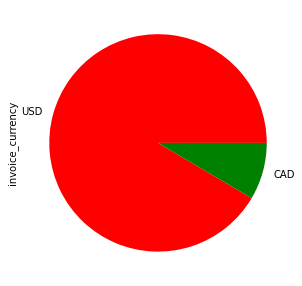

In [214]:
# Let's see counts and visulaisation of invoice_currency
invoice_count=df.invoice_currency.value_counts()
print(invoice_count)
invoice_count.plot(kind='pie',figsize=(5, 5), colors = ['red', 'green'])

In [216]:
""" We can easily infer from above that CAD is less than USD so we can conver CAD into USD for better ease.!"""\

df['total_open_amount'] = np.where(df['invoice_currency']=="CAD",df['total_open_amount']*0.78,df['total_open_amount'])
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200760666,KEHE corp,2019-11-08,2019,1.930019e+09,2019-10-18,2019-10-16,2019-10-18,2019-11-02,USD,5501.96,2019-10-18,NAA8,1.930019e+09
1,U001,0200331749,SYSC in,2019-11-27,2019,1.930133e+09,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,24996.85,2019-11-09,NAA8,1.930133e+09
2,U001,0200955827,KE corporation,2019-05-10,2019,1.929187e+09,2019-04-23,2019-04-22,2019-04-23,2019-05-08,USD,6470.50,2019-04-23,NAA8,1.929187e+09
3,U001,0100050364,SING foundation,2019-07-23,2019,1.929584e+09,2019-07-08,2019-07-06,2019-07-08,2019-07-23,USD,21793.39,2019-07-08,NAA8,1.929584e+09
4,U001,0200466603,SMITH'S trust,2019-04-02,2019,1.928982e+09,2019-03-18,2019-03-18,2019-03-18,2019-04-02,USD,50288.53,2019-03-18,NAA8,1.928982e+09


In [217]:
# Alright total amount have got changed so now there's no need of invoice_currency column
df.drop('invoice_currency',axis=1,inplace=True)

### Before splitting the Dataset into train,test and val. Create the target column "Delay" which we need to predict

In [218]:
#Creating the delay columns

df['delay']=(df['clear_date']-df['due_in_date']).dt.days
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200760666,KEHE corp,2019-11-08,2019,1.930019e+09,2019-10-18,2019-10-16,2019-10-18,2019-11-02,5501.96,2019-10-18,NAA8,1.930019e+09,6
1,U001,0200331749,SYSC in,2019-11-27,2019,1.930133e+09,2019-11-09,2019-11-09,2019-11-09,2019-11-24,24996.85,2019-11-09,NAA8,1.930133e+09,3
2,U001,0200955827,KE corporation,2019-05-10,2019,1.929187e+09,2019-04-23,2019-04-22,2019-04-23,2019-05-08,6470.50,2019-04-23,NAA8,1.929187e+09,2
3,U001,0100050364,SING foundation,2019-07-23,2019,1.929584e+09,2019-07-08,2019-07-06,2019-07-08,2019-07-23,21793.39,2019-07-08,NAA8,1.929584e+09,0
4,U001,0200466603,SMITH'S trust,2019-04-02,2019,1.928982e+09,2019-03-18,2019-03-18,2019-03-18,2019-04-02,50288.53,2019-03-18,NAA8,1.928982e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46725,U001,0200714710,SYSCO associates,2020-01-31,2020,1.930391e+09,2020-01-14,2020-01-12,2020-01-14,2020-01-29,33633.35,2020-01-14,NAA8,1.930391e+09,2
46726,U001,0200769623,WAL-MAR foundation,2019-06-10,2019,1.929400e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,21143.81,2019-05-29,NAH4,1.929400e+09,-3
46727,U001,0200726979,BJ'S us,2019-08-16,2019,1.929682e+09,2019-08-01,2019-07-31,2019-08-01,2019-08-16,288.15,2019-08-01,NAA8,1.929682e+09,0
46728,U001,0200707822,PUBLI,2020-01-29,2020,1.930401e+09,2020-01-14,2020-01-15,2020-01-14,2020-01-29,116648.24,2020-01-14,NAA8,1.930401e+09,0


In [219]:
# As we are dealing with datetime column we are going to split the dataframe on basis of 'document_create_date.1' after sorting it.

sorted_df = df.sort_values(by='document_create_date.1')
sorted_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
17050,U001,0200769623,WAL-MAR llc,2019-01-10,2019,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,756.280000,2018-12-30,NAH4,1.928543e+09,-4
10016,CA02,0140106181,THE corp,2019-05-01,2019,2.960520e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,71622.886140,2018-12-31,CA10,2.960520e+09,111
500,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,7552.270000,2018-12-30,NAH4,1.928533e+09,-5
15901,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,15387.910000,2018-12-30,NAH4,1.928540e+09,-5
29000,U001,0200769623,WAL-MAR systems,2019-01-11,2019,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,23519.850000,2018-12-30,NAH4,1.928543e+09,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37771,U001,0100028715,SPECIALT systems,2020-03-12,2020,1.930553e+09,2020-02-26,2020-02-21,2020-02-26,2020-03-12,5955.260000,2020-02-26,NAA8,1.930553e+09,0
3052,U001,0200769623,WAL-MAR trust,2020-03-17,2020,1.930568e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,10401.630000,2020-02-27,NAH4,1.930568e+09,4
27431,U001,0200794332,COST corp,2020-03-12,2020,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,8793.090000,2020-02-27,NAAX,1.930574e+09,-1
25576,CA02,0140106408,WAL-M systems,2020-03-16,2020,2.960614e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-10,35089.007616,2020-02-29,CA10,2.960614e+09,6


In [220]:
#splitting on sorted dataframe
#Let's analyze the time difference of oldest and newest doc_create_date to get idea of range
sorted_df.reset_index(inplace=True,drop=True)
timeDiff_df=(sorted_df['document_create_date.1'].iloc[-1].to_pydatetime('M') - sorted_df['document_create_date.1'].iloc[0].to_pydatetime('M'))
print(timeDiff_df)

424 days, 0:00:00


In [221]:
"""As we can infer from above time difference is off somewhere 
        around 14 months so we can split it furthur into 10month for train and 2-2 months for val and test """\

x_train=sorted_df[sorted_df['document_create_date.1'] < '2019-11-30'].copy()
x_test_forNow=sorted_df[sorted_df['document_create_date.1'] >= '2019-11-30'].copy()

In [222]:
x_val=x_test_forNow[x_test_forNow['document_create_date.1'] < '2020-1-20'].copy()
x_test=x_test_forNow[x_test_forNow['document_create_date.1'] >= '2020-1-20'].copy()

In [223]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(36512, 15)
(3642, 15)
(3807, 15)


### Analysis and Visualization of the Dataset

- Look out for if there's duplicate columns and needed to removed as they are just redundant.

In [224]:
x_train_transposed = x_train.T
x_train.T.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1     True
due_in_date               False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
delay                     False
dtype: bool

As we can see from above inference that two columns are coming True,they must be copy of another.


In [225]:
#dropping first and keep last column occurance,
#as we have sorted on document_create_date.1 we have to keep it for now

x_train_transposed.drop_duplicates(keep="last", inplace=True)

In [226]:
x_train=x_train_transposed.T

In [227]:
#document_create_date is also of no use so better to remove as we have doument_create_date.1
x_train.drop('document_create_date',axis=1,inplace=True)

- So far we have reduced it to 12 columns and removed unnecessary columns and rows.!
- Now we'll analyze the dataset on both categorical and continuos columns and will keep only those columns which provide some knowledge for Training model

In [228]:
x_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                        object
delay                             object
dtype: object

In [229]:
x_train.describe(include=np.object)

,business_code,cust_number,name_customer,buisness_year,total_open_amount,cust_payment_terms,invoice_id,delay
count,36512,36512,36512,36512,36512.0,36512,3.651200e+04,36512
unique,6,1331,3858,1,33227.0,51,3.651200e+04,181
top,U001,0200769623,WAL-MAR foundation,2019,1897.5,NAA8,1.929983e+09,0
freq,32693,8343,858,36512,104.0,15637,1.000000e+00,8163


- from above description we can see that business_year is now constant column and needed to remove that

In [230]:
x_train.drop('buisness_year',axis=1,inplace=True)
x_train.describe(include=np.object)

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,invoice_id,delay
count,36512,36512,36512,36512.0,36512,3.651200e+04,36512
unique,6,1331,3858,33227.0,51,3.651200e+04,181
top,U001,0200769623,WAL-MAR foundation,1897.5,NAA8,1.929983e+09,0
freq,32693,8343,858,104.0,15637,1.000000e+00,8163


invoice_id seems to be unique as proved below but to analyze more i am keeping it for now and will remove later

In [231]:
# Prove that invoice_id is unique for each invoices
print(True if x_train['invoice_id'].nunique()==x_train.shape[0] else False)

True


               invoice_id
business_code            
CA02                 3155
U001                32693
U002                  117
U005                   11
U007                    1
U013                  535


<AxesSubplot:xlabel='business_code'>

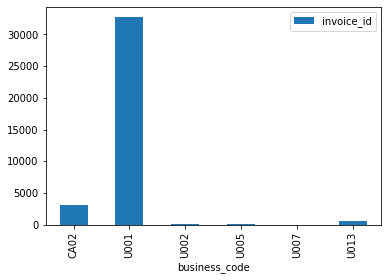

In [232]:
# Plot a graph to analyze no. of invoices one business_code have
invoices_have = pd.DataFrame(x_train.groupby('business_code')['invoice_id'].count())
print(invoices_have)
invoices_have.plot(kind='bar')

### OUTLIER ANALYSIS AND TREATMENT

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='delay'>

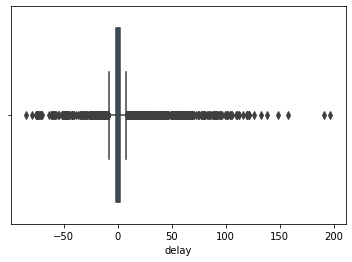

In [233]:
# DELAY OUTLIER ANALYSIS
sns.boxplot(x_train.delay)

In [234]:
def outlier_boundary(feature, distance):
    
    IQR = feature.quantile(0.75) - feature.quantile(0.25)

    lower_boundary = feature.quantile(0.25) - (IQR * distance)
    upper_boundary = feature.quantile(0.75) + (IQR * distance)

    count =0
    for label in feature:
        if label <= lower_boundary or label>= upper_boundary:
            count += 1
    percent_outliers = count * 100/len(feature)
    return upper_boundary, lower_boundary,percent_outliers

In [235]:
upper_boundary, lower_boundary,outlier_percent = outlier_boundary(x_train['delay'], 3.0)
print("Lower Boundary= ",lower_boundary,"\nUpper Boundary= ", upper_boundary,"\nOutlier Percentage Present = ",outlier_percent)

Lower Boundary=  -14.0 
Upper Boundary=  14.0 
Outlier Percentage Present =  4.584794040315512


In [237]:
print(x_train.delay.quantile(0.99))
print(x_train.delay.quantile(1))


34.0
197.0


In [238]:
# replacing upper and lower with min and max values as can seen above that there's huge diff at 0.99 and 1
upper = x_train['delay'].quantile(0.995)
lower = x_train['delay'].quantile(0.05)
print(upper)
print(lower)

63.44499999999971
-5.0


In [239]:
x_train.loc[(x_train.delay>upper),'delay'] = upper
x_train.loc[(x_train.delay<lower),'delay'] = lower
#replacing with min and max

Lower Boundary=  -14.0 
Upper Boundary=  14.0 
Outlier Percentage Present =  3.0373575810692377


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='delay'>

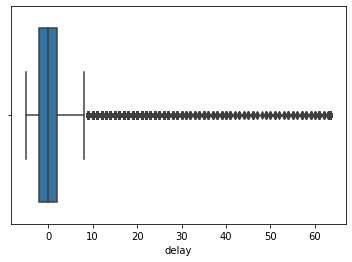

In [240]:
# CHECKING AGAIN FOR CONFIRMATION
upper_boundary, lower_boundary,outlier_percent = outlier_boundary(x_train['delay'], 3.0)
print("Lower Boundary= ",lower_boundary,"\nUpper Boundary= ", upper_boundary,"\nOutlier Percentage Present = ",outlier_percent)

sns.boxplot(x_train.delay)

0.10      951.65184
0.25     5367.14500
0.50    18225.56000
0.75    47580.50750
Name: total_open_amount, dtype: object


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_open_amount'>

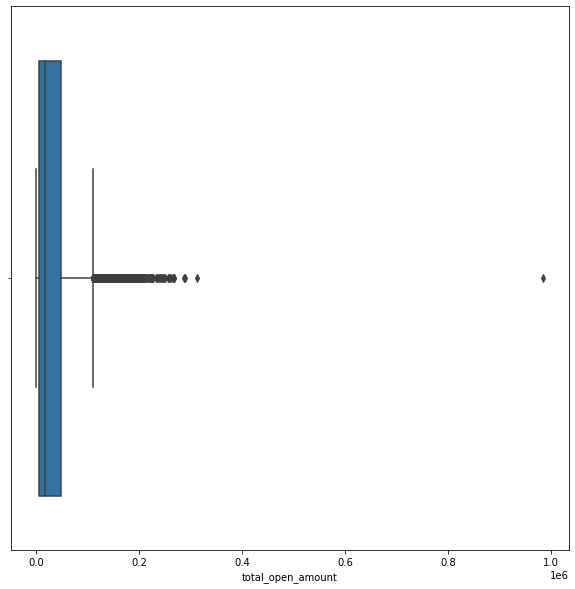

In [241]:
# OPEN AMOUNT OUTLIERS

quantOf_amount=x_train['total_open_amount'].quantile([.1,.25,.5,.75])
print(quantOf_amount)
plt.figure(figsize=(10,10))
sns.boxplot(x_train.total_open_amount)

- We can see from above that the amounts are very high and we have learned that outliers are'nt always to remove so let's analyze more

In [242]:
#Extract rows having more that 300000 total open amount
x_train[x_train.total_open_amount>=300000]

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
13075,U001,0100058056,SIMPLO corporation,2019-04-30,2019-04-29,2019-05-14,312569.73,2019-04-29,NAA8,1929228192.0,-5.0
32262,U001,0100051674,FLAGS llc,2019-11-21,2019-10-21,2019-11-20,985247.06,2019-10-21,NAD5,1930037223.0,1


- We can not totally ignore as some of them good amount are being paid late and for any company value of amount must make more weightage than low amounts.

### Let's create some more features to analyze furthur more

In [243]:
""" From delay column let's create a feature which indicate 1 for paidLate and 0 for paidOnTime or before"""

x_train['islate'] = x_train['delay'].apply(lambda x: 1 if x>0 else 0)
x_val['islate'] = x_val['delay'].apply(lambda x: 1 if x>0 else 0)
x_test['islate'] = x_test['delay'].apply(lambda x: 1 if x>0 else 0)
x_train.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,islate
0,U001,0200769623,WAL-MAR llc,2019-01-10,2018-12-30,2019-01-14,756.28000,2018-12-30,NAH4,1928542985.0,-4,0
1,CA02,0140106181,THE corp,2019-05-01,2018-12-30,2019-01-10,71622.88614,2018-12-31,CA10,2960519768.0,63.445,1
2,U001,0200769623,WAL-MAR trust,2019-01-09,2018-12-30,2019-01-14,7552.27000,2018-12-30,NAH4,1928533171.0,-5,0
3,U001,0200769623,WAL-MAR trust,2019-01-09,2018-12-30,2019-01-14,15387.91000,2018-12-30,NAH4,1928539932.0,-5,0
4,U001,0200769623,WAL-MAR systems,2019-01-11,2018-12-30,2019-01-14,23519.85000,2018-12-30,NAH4,1928543316.0,-3,0


Plotting graph between business_code to see trend of being on time and getting late

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


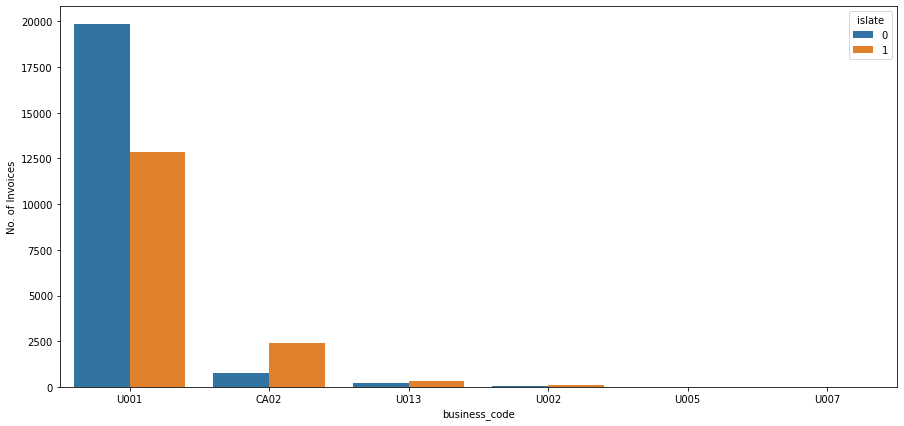

In [249]:
plt.figure(figsize=(15,7))
plot_islate=sns.countplot(x_train['business_code'],hue=x_train['islate'])
plt.ylabel('No. of Invoices')
plt.show()

- from above we can infer that business_code 'U001' is tend to pay on time whereas 'CA02'&'U013' is tend to pay late



- With help of this analysis we can create a feature which will tell no of invoice get paid on time and no. of invoice get paid late and also thier ratio

In [250]:
x_train['delay']=x_train.delay.astype(int)

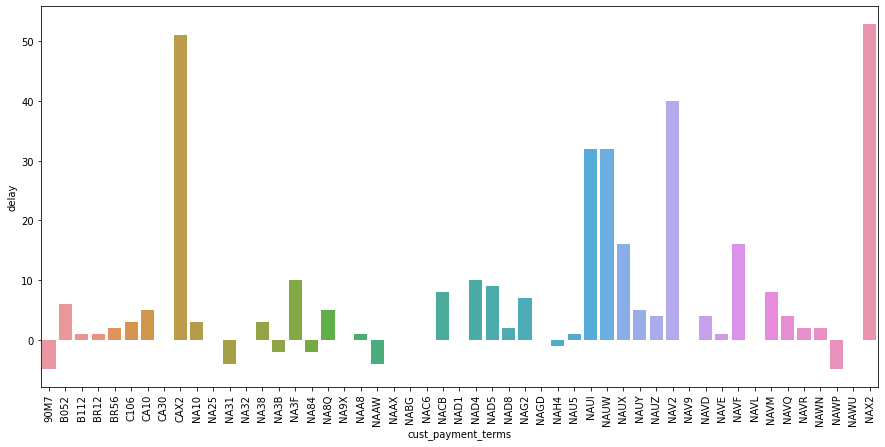

In [251]:
# Let's analyze the average delay by each cust_terms
avg_delay = pd.DataFrame((x_train.groupby('cust_payment_terms')['delay'].mean()).astype(int))
plt.figure(figsize=(15,7))
plot=sns.barplot(x=avg_delay.index,y='delay',data=avg_delay)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

- As we can see above many transactions under some cust_payment_term have negative average delay which could be a great insight to work on

In [252]:
x_train['total_open_amount']=x_train.total_open_amount.astype(float)

In [253]:
#Creating feature of avg no. of amount lie in each cust_payment_terms

mapper1 = x_train.groupby('cust_payment_terms')['total_open_amount'].mean().to_dict()
x_train['avgAmt_byCustTerm'] = x_train['cust_payment_terms'].map(mapper1)
x_val['avgAmt_byCustTerm'] = x_val['cust_payment_terms'].map(mapper1)
x_val['avgAmt_byCustTerm'].fillna(value=x_train.total_open_amount.mean(),inplace=True)
x_test['avgAmt_byCustTerm'] = x_test['cust_payment_terms'].map(mapper1)
x_test['avgAmt_byCustTerm'].fillna(value=x_train.total_open_amount.mean(),inplace=True)

#Creating feature of avg no. of invoice lie in each cust|_payment_term
mapper2 = (x_train.cust_payment_terms.value_counts()).to_dict()
x_train['avgInv_generated_byCustTerm'] = x_train['cust_payment_terms'].map(mapper2).apply(np.ceil)
x_val['avgInv_generated_byCustTerm'] = x_val['cust_payment_terms'].map(mapper2).apply(np.ceil)
x_val['avgInv_generated_byCustTerm'].fillna(value=1,inplace=True)
x_test['avgInv_generated_byCustTerm'] = x_test['cust_payment_terms'].map(mapper2).apply(np.ceil)
x_test['avgInv_generated_byCustTerm'].fillna(value=1,inplace=True)


- Now let's analyze the trend of amount of invoice with business code and islate

<AxesSubplot:title={'center':'average paid amount per business_code'}, xlabel='business_code'>

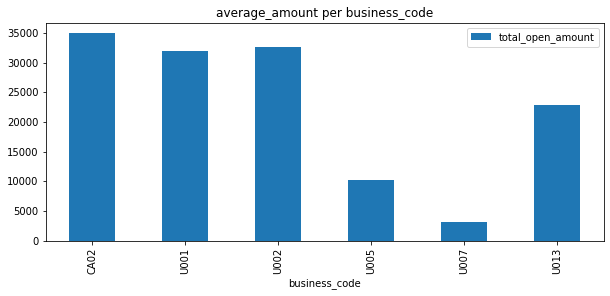

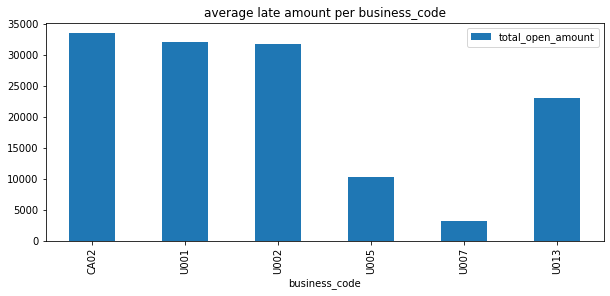

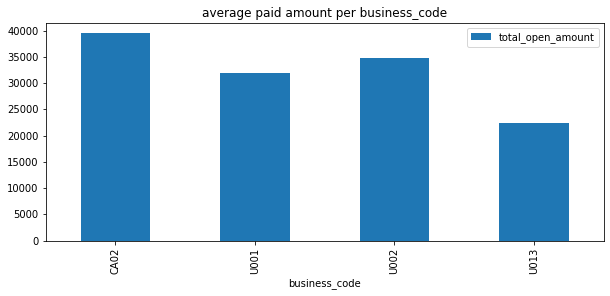

In [256]:
x_train['total_open_amount']=x_train.total_open_amount.astype(float)

average_amount = pd.DataFrame(x_train.groupby('business_code')['total_open_amount'].mean())

averageLate_amount = pd.DataFrame(x_train[x_train.islate==1].groupby('business_code')['total_open_amount'].mean())

averagePaid_amount = pd.DataFrame(x_train[x_train.islate==0].groupby('business_code')['total_open_amount'].mean())

average_amount.plot(kind='bar',figsize=(10,4),title='average_amount per business_code')
averageLate_amount.plot(kind='bar',figsize=(10,4),title='average late amount per business_code')
averagePaid_amount.plot(kind='bar',figsize=(10,4),title='average paid amount per business_code')

- There's some inference like U007.U005 have'nt paid any invoices on time, also U001 which has most no. of invoices which we have seen already is also have average equally distributed

- Let's extract useful features from due date and see if we can find some inshights from that.!

<AxesSubplot:xlabel='due_in_date', ylabel='delay'>

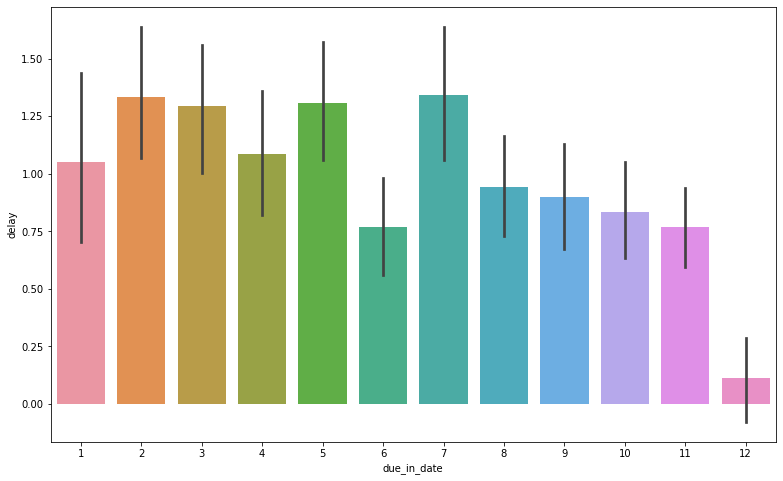

In [257]:
# Anlayzing baseline_date to get more inshights
plt.figure(figsize=(13,8))
sns.barplot(x=x_train.due_in_date.dt.month,y='delay',data=x_train)

In [258]:
# Creating a due_month to see which month have more no of invoices PAID/LATE and if we can extract some insight or not
x_train['due_month'] = x_train['due_in_date'].dt.month
x_val['due_month'] = x_val['due_in_date'].dt.month
x_test['due_month'] = x_test['due_in_date'].dt.month

-  We know that saturday and sunday in mainly holiday and that's why due_date lying on sat and sunday must be getting paid later so let's prove that below

<AxesSubplot:xlabel='weekdays', ylabel='No. of invoices'>

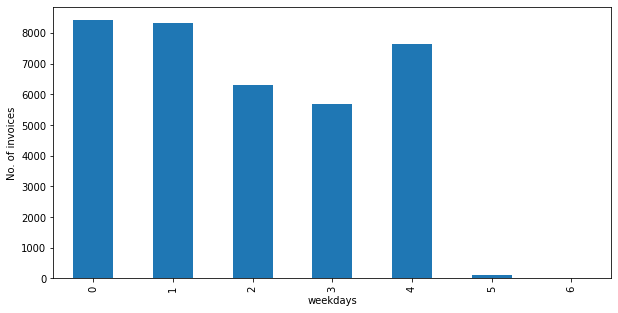

In [262]:
#ANALYZING CLEARING DATE FOR WEEK_DAYS
x_train['temp_clear_weeks'] = x_train['clear_date'].dt.weekday

#plotting to visulaize
temp_weeks=x_train.groupby('temp_clear_weeks')['clear_date'].count()
temp_weeks.plot(kind='bar',figsize=(10,5),xlabel='weekdays',ylabel='No. of invoices')

As we can see that many less amount of invoices are getting clear on weekdays so if there's some due date which lie on Weekend then there must be tendency to get paid either earlier or late to the weekend

let's create a binary feature that state due_date is weekend or not by 1 and 0

In [263]:
#EXTRACTING WEEKDAY
x_train['due_weekday'] = x_train['due_in_date'].dt.weekday
x_val['due_weekday'] = x_val['due_in_date'].dt.weekday
x_test['due_weekday'] = x_test['due_in_date'].dt.weekday

#EXTRACTING WEEK
x_train['due_weeks'] = x_train['due_in_date'].dt.week
x_val['due_weeks'] = x_val['due_in_date'].dt.week
x_test['due_weeks'] = x_test['due_in_date'].dt.week

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [264]:
x_train['isweekend'] = x_train.due_weeks.apply(lambda x:1 if x==5 or x==6 else 0)
x_val['isweekend'] = x_val.due_weeks.apply(lambda x:1 if x==5 or x==6 else 0)
x_test['isweekend'] = x_test.due_weeks.apply(lambda x:1 if x==5 or x==6 else 0)

#### Let's create some more features and if needed to remove we'll do that later.

       - Invoice_amount bin
       - Average amount paid by each cust_number.
       - Average amount paid Late by each cust_number.
       - Ratio of amount paid Late by each custome on an average.

In [265]:
x_val.reset_index(inplace=True)
x_val.drop('index',axis=1,inplace=True)

x_test.reset_index(inplace=True)
x_test.drop('index',axis=1,inplace=True)

In [266]:
# Average amount paid by each customer
avgAmtPaid = x_train.groupby('cust_number')['total_open_amount'].mean().to_dict()
x_train['avgAmtPaid'] = x_train['cust_number'].map(avgAmtPaid)
x_train['avgAmtPaid'].fillna(value=x_train.total_open_amount.mean(),inplace=True)
x_val['avgAmtPaid'] = x_val['cust_number'].map(avgAmtPaid)
x_val['avgAmtPaid'].fillna(value=x_train.total_open_amount.mean(),inplace=True)
x_test['avgAmtPaid'] = x_test['cust_number'].map(avgAmtPaid)
x_test['avgAmtPaid'].fillna(value=x_train.total_open_amount.mean(),inplace=True)


# Average amount paid Late by each customer
avgAmtPaid_Late = x_train[x_train.islate==1].groupby('cust_number')['total_open_amount'].mean().to_dict()
x_train['avgAmtPaid_Late'] = x_train['cust_number'].map(avgAmtPaid_Late)
x_train['avgAmtPaid_Late'].fillna(value=x_train.total_open_amount.mean(),inplace=True)
x_val['avgAmtPaid_Late'] = x_val['cust_number'].map(avgAmtPaid_Late)
x_val['avgAmtPaid_Late'].fillna(value=x_train.total_open_amount.mean(),inplace=True)
x_test['avgAmtPaid_Late'] = x_test['cust_number'].map(avgAmtPaid_Late)
x_test['avgAmtPaid_Late'].fillna(value=x_train.total_open_amount.mean(),inplace=True)



In [267]:
# BaseLine Due month
x_train['doc_dueMonth'] = x_train['document_create_date.1'].dt.month
x_val['doc_dueMonth'] = x_val['document_create_date.1'].dt.month
x_test['doc_dueMonth'] = x_test['document_create_date.1'].dt.month

x_train['baseline_dueMonth'] = x_train['baseline_create_date'].dt.month
x_val['baseline_dueMonth'] = x_val['baseline_create_date'].dt.month
x_test['baseline_dueMonth'] = x_test['baseline_create_date'].dt.month

In [268]:
x_train['delay']=x_train.delay.astype(int)

In [270]:
mapper_mon = x_train.groupby('due_month')['delay'].mean().to_dict() 
x_train['due_month_avg_delay'] = x_train['due_month'].map(mapper_mon).apply(np.ceil)
x_val['due_month_avg_delay'] = x_val['due_month'].map(mapper_mon).apply(np.ceil)
x_test['due_month_avg_delay'] = x_test['due_month'].map(mapper_mon).apply(np.ceil)

In [272]:
#for emeregncy case
x_emerg=x_train.copy()
x_emerg.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'document_create_date.1', 'due_in_date', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'delay',
       'islate', 'avgAmt_byCustTerm', 'avgInv_generated_byCustTerm',
       'due_month', 'due_weekday', 'due_weeks', 'temp_clear_weeks',
       'isweekend', 'avgAmtPaid', 'avgAmtPaid_Late', 'doc_dueMonth',
       'baseline_dueMonth', 'due_weekday_avg_delay', 'due_month_avg_delay',
       'terms_avg_delay'],
      dtype='object')

In [273]:
#Let's remove some column as they are unique like invoice_id and not making great influence to model
x_train.drop((['name_customer','invoice_id']),axis=1,inplace=True)
x_val.drop((['name_customer','invoice_id']),axis=1,inplace=True)
x_test.drop((['name_customer','invoice_id']),axis=1,inplace=True)

In [274]:
#Remove Date columns as we have already extracted month and required weekdays
x_train.drop((['document_create_date.1','baseline_create_date','due_in_date']),axis=1,inplace=True)
x_val.drop((['document_create_date.1','baseline_create_date','due_in_date']),axis=1,inplace=True)
x_test.drop((['document_create_date.1','baseline_create_date','due_in_date']),axis=1,inplace=True)

In [275]:
#Remove isLate and clearDate too as this is not going to be in the actual ext_test_dataset
x_train.drop(['islate','clear_date'],axis=1,inplace=True)
x_val.drop(['islate','clear_date'],axis=1,inplace=True)
x_test.drop(['islate','clear_date'],axis=1,inplace=True)

- ENCODING

In [276]:
""" Label Encoding of business code"""
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
x_train['business_code']= label_encoder.fit_transform(x_train['business_code']) 
x_val['business_code']= label_encoder.fit_transform(x_val['business_code'])  
x_val.reset_index(inplace=True)
x_test['business_code']= label_encoder.fit_transform(x_test['business_code'])  
x_test.reset_index(inplace=True)

In [277]:
x_train['total_open_amount']=x_train.total_open_amount.astype(float)
x_train['delay']=x_train.delay.astype(int)

In [279]:
#target encoding
mapper = x_train.groupby('cust_payment_terms')['delay'].mean().to_dict()
x_train['cust_payment_terms_norm'] = x_train['cust_payment_terms'].map(mapper)
x_val['cust_payment_terms_norm'] = x_val['cust_payment_terms'].map(mapper)
x_val['cust_payment_terms_norm'].fillna(value=x_train.delay.mean(),inplace=True)
x_test['cust_payment_terms_norm'] = x_test['cust_payment_terms'].map(mapper)
x_test['cust_payment_terms_norm'].fillna(value=x_train.delay.mean(),inplace=True)

In [280]:
#target encoding
mapper_cust_num = x_train.groupby('cust_number')['delay'].mean().to_dict()
x_train['cust_number_norm'] = x_train['cust_number'].map(mapper_cust_num)
x_val['cust_number_norm'] = x_val['cust_number'].map(mapper_cust_num)
x_val['cust_number_norm'].fillna(value=x_train.delay.mean(),inplace=True)
x_test['cust_number_norm'] = x_test['cust_number'].map(mapper_cust_num)
x_test['cust_number_norm'].fillna(value=x_train.delay.mean(),inplace=True)

In [282]:
# copying the x_train for further procedure
x_train_temp = x_train.copy()
y_train_temp = (x_train['delay'])
y_train_temp

0        -4
1        63
2        -5
3        -5
4        -3
         ..
36507     0
36508     3
36509    -5
36510    -5
36511    -5
Name: delay, Length: 36512, dtype: int32

In [283]:
# On validation
x_val_temp = x_val.copy()
y_val_temp = x_val['delay']

# On local tester
x_test_temp = x_test.copy()
y_test_temp = x_test['delay']

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

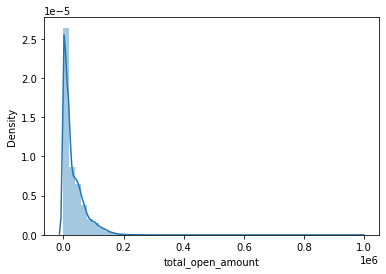

In [284]:
sns.distplot(x_train_temp.total_open_amount)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount_norm', ylabel='Density'>

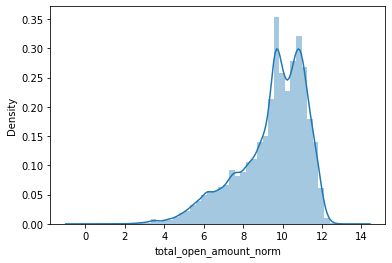

In [285]:
#normalizing total|_open_amount as it's positively skewwed and we need to handle that
x_train_temp['total_open_amount_norm'] = np.log(x_train_temp.total_open_amount)
x_val_temp['total_open_amount_norm'] = np.log(x_val_temp.total_open_amount)
x_test_temp['total_open_amount_norm'] = np.log(x_test_temp.total_open_amount)

#Plotting of normalized total amount
sns.distplot(x_train_temp.total_open_amount_norm)

In [344]:
#Scaling of total amount
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
# Scaling total_open_amount
x_train_temp['total_open_amount_scl'] = min_max_scaler.fit_transform(x_train_temp[['total_open_amount_norm']])
x_val_temp['total_open_amount_scl'] = min_max_scaler.fit_transform(x_val_temp[['total_open_amount_norm']])
x_test_temp['total_open_amount_scl'] = min_max_scaler.fit_transform(x_test_temp[['total_open_amount_norm']])


x_train_temp['business_code_scl'] = min_max_scaler.fit_transform(x_train_temp[['business_code']])
x_val_temp['business_code_scl'] = min_max_scaler.fit_transform(x_val_temp[['business_code']])
x_test_temp['business_code_scl'] = min_max_scaler.fit_transform(x_test_temp[['business_code']])


## Feature Selection

In [287]:
x_train_temp.drop(['cust_number','cust_payment_terms'],axis=1,inplace=True)

In [288]:
x_train_temp = x_train_temp.drop('delay',axis=1)

In [289]:
# HNADLING CORELATIONS
def handling_correlation(df1,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [290]:
handling_correlation(x_train_temp,0.8)

['invoice_id']

<AxesSubplot:>

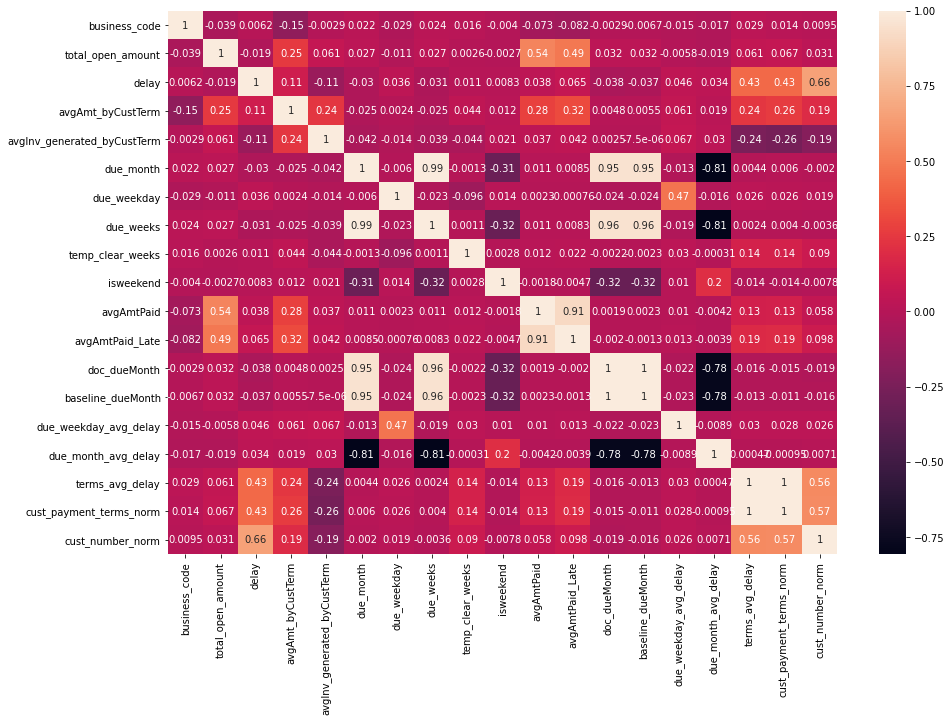

In [291]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(), annot=True)

##### embeded method


In [292]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

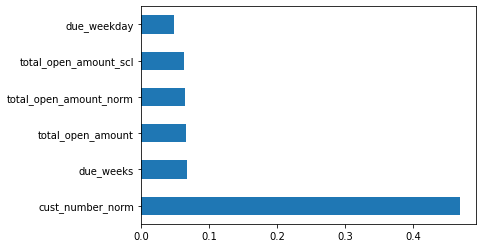

In [293]:
feature_importance=tree_based_feature_importance(x_train_temp,y_train_temp)

- Final feature Selection

In [294]:
#SELECTING SUITABLE FEATURES WHICH GIVING GOOD ACCURACY AND SCORE
final_features = ['business_code','total_open_amount','cust_number_norm','cust_payment_terms_norm','due_weekday']
x_train_final=x_train_temp[final_features]
x_val_final = x_val_temp[final_features]
x_test_final = x_test_temp[final_features]
x_test_final.isna().sum()

business_code              0
total_open_amount          0
cust_number_norm           0
cust_payment_terms_norm    0
due_weekday                0
dtype: int64

##  MODEL TRAINING

In [295]:

# Trying out random forest to check the important features
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

In [296]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

#### LINEAR REGRESSION

In [298]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train_final, y_train_temp)

# Predicting the Test Set Results
predicted = clf.predict(x_val_final)

In [299]:
from sklearn.metrics import r2_score
MSE_Score.append(mean_squared_error(y_val_temp, predicted))
R2_Score.append(r2_score(y_val_temp, predicted))

#### Decision Tree Regressor

In [300]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train_final, y_train_temp)

# Predicting the Test Set Results
predicted = clf.predict(x_val_final)

In [301]:
from sklearn.metrics import r2_score
MSE_Score.append(mean_squared_error(y_val_temp, predicted))
R2_Score.append(r2_score(y_val_temp, predicted))

#### RANDOM FOREST

In [302]:
Algorithm.append('Random Forest Regression')
rgr = RandomForestRegressor()
rgr.fit(x_train_final, y_train_temp)

RandomForestRegressor()

In [303]:
rgr.score(x_train_final, y_train_temp)

0.8947471820799758

In [304]:
pred_val = rgr.predict(x_val_final)
pred_val

array([-5.  ,  1.52, -5.  , ...,  1.36, -4.36, -5.  ])

In [305]:
pred_test = rgr.predict(x_test_final)
pred_test

array([-2.85      ,  0.25      ,  0.22      , ..., -0.26937204,
        9.05      ,  2.59      ])

In [306]:
from sklearn.metrics import r2_score
MSE_Score.append(mean_squared_error(y_val_temp, pred_val))
R2_Score.append(r2_score(y_val_temp, pred_val))

In [307]:
from sklearn.metrics import r2_score
print(mean_absolute_error(y_test_temp, pred_test))
print(mean_squared_error(y_test_temp, pred_test))
print(r2_score(y_test_temp, pred_test))

3.3439165650492186
61.735956246611444
0.18790412770723508


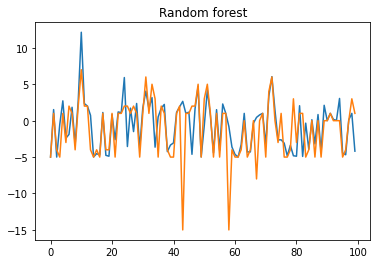

In [308]:
plt.title("Random forest")
plt.plot(range(len(pred_val))[:100],pred_val[:100])
plt.plot(range(len(pred_val))[:100],y_val_temp[:100])
plt.show()

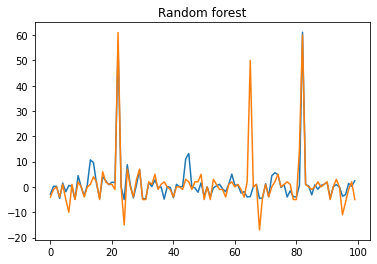

In [309]:
plt.title("Random forest")
plt.plot(range(len(pred_test))[:100],pred_test[:100])
plt.plot(range(len(pred_test))[:100],y_test_temp[:100])
plt.show()

#### XGB Regressor

In [310]:
Algorithm.append('XGB Regressor')
clf = RandomForestRegressor()
clf.fit(x_train_final, y_train_temp)

# Predicting the Test Set Results
predicted = clf.predict(x_val_final)

In [311]:
clf.score(x_train_final, y_train_temp)

0.8963300695569952

In [312]:
from sklearn.metrics import r2_score
MSE_Score.append(mean_squared_error(y_val_temp, predicted))
R2_Score.append(r2_score(y_val_temp, predicted))

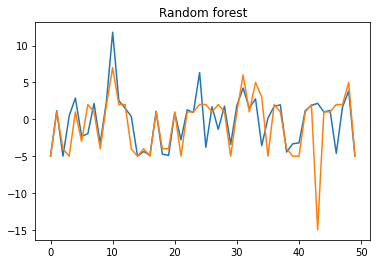

In [313]:
plt.title("Random forest")
plt.plot(range(len(predicted))[:50],predicted[:50])
plt.plot(range(len(predicted))[:50],y_val_temp[:50])
plt.show()

In [314]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,52.602369,0.249031
1,Linear Regression,68.035883,0.028696
2,Decision Tree Regressor,56.049625,0.199816
3,Random Forest Regression,55.991954,0.200640


In [315]:
# SELECTING FINAL MODEL

""" As can seen above best results we have got through regression random forest so i'll choose that as final_model """

final_model = rgr

---
---
# ON FINAL HRC TEST DATASET
---
---

In [316]:
ext_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930707e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,7636.99,20200327.0,NAH4,1.930707e+09,1
1,U001,0200759878,SA foundation,NaN,2020.0,1.930732e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,NaN,14814.54,20200403.0,NAH4,1.930732e+09,1
2,U001,200799367,MCL in,NaN,2020.0,1.930646e+09,2020-03-17,20200312,20200317,20200401.0,USD,RV,1.0,NaN,16625.03,20200317.0,NAA8,1.930646e+09,1
3,U001,0200555117,BURR corp,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,NaN,105738.73,20200403.0,NAA8,1.930738e+09,1
4,U001,0200749225,SUPER systems,NaN,2020.0,1.930681e+09,2020-03-23,20200321,20200323,20200407.0,USD,RV,1.0,NaN,58179.56,20200323.0,NAA8,1.930681e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930830e+09,2020-04-26,20200427,20200426,20200511.0,USD,RV,1.0,NaN,39455.88,20200426.0,NAH4,1.930830e+09,1
3266,U001,200772670,ASSOCIAT llc,NaN,2020.0,1.930707e+09,2020-03-26,20200327,20200326,20200410.0,USD,RV,1.0,NaN,110419.97,20200326.0,NAU5,1.930707e+09,1
3267,U001,0200786288,FAMILY associates,NaN,2020.0,1.930646e+09,2020-03-13,20200313,20200313,20200328.0,USD,RV,1.0,NaN,13974.93,20200313.0,NAA8,1.930646e+09,1
3268,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930624e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,NaN,46703.39,20200309.0,NAH4,1.930624e+09,1


In [317]:
x_train_temp.columns

Index(['business_code', 'total_open_amount', 'avgAmt_byCustTerm',
       'avgInv_generated_byCustTerm', 'due_month', 'due_weekday', 'due_weeks',
       'temp_clear_weeks', 'isweekend', 'avgAmtPaid', 'avgAmtPaid_Late',
       'doc_dueMonth', 'baseline_dueMonth', 'due_weekday_avg_delay',
       'due_month_avg_delay', 'terms_avg_delay', 'cust_payment_terms_norm',
       'cust_number_norm', 'total_open_amount_norm', 'total_open_amount_scl',
       'business_code_scl'],
      dtype='object')

In [318]:
ext_data.due_in_date

0       20200411.0
1       20200418.0
2       20200401.0
3       20200418.0
4       20200407.0
           ...    
3265    20200511.0
3266    20200410.0
3267    20200328.0
3268    20200324.0
3269    20200428.0
Name: due_in_date, Length: 3270, dtype: float64

In [319]:
#Extracting weekday in ext_testdata as welll

ext_data['due_in_date'] = pd.to_datetime(ext_data['due_in_date'],format='%Y%m%d')
ext_data['due_weekday'] = ext_data.due_in_date.dt.weekday

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [320]:
#Label encoding on Business_code in final data_set
ext_data['business_code']= label_encoder.fit_transform(ext_data['business_code'])  
ext_data

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,due_weekday
0,1,0200769623,WAL-MAR co,NaN,2020.0,1.930707e+09,2020-03-27,20200326,20200327,2020-04-11,USD,RV,1.0,NaN,7636.99,20200327.0,NAH4,1.930707e+09,1,5
1,1,0200759878,SA foundation,NaN,2020.0,1.930732e+09,2020-04-03,20200402,20200403,2020-04-18,USD,RV,1.0,NaN,14814.54,20200403.0,NAH4,1.930732e+09,1,5
2,1,200799367,MCL in,NaN,2020.0,1.930646e+09,2020-03-17,20200312,20200317,2020-04-01,USD,RV,1.0,NaN,16625.03,20200317.0,NAA8,1.930646e+09,1,2
3,1,0200555117,BURR corp,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,2020-04-18,USD,RV,1.0,NaN,105738.73,20200403.0,NAA8,1.930738e+09,1,5
4,1,0200749225,SUPER systems,NaN,2020.0,1.930681e+09,2020-03-23,20200321,20200323,2020-04-07,USD,RV,1.0,NaN,58179.56,20200323.0,NAA8,1.930681e+09,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,1,0200769623,WAL-MAR co,NaN,2020.0,1.930830e+09,2020-04-26,20200427,20200426,2020-05-11,USD,RV,1.0,NaN,39455.88,20200426.0,NAH4,1.930830e+09,1,0
3266,1,200772670,ASSOCIAT llc,NaN,2020.0,1.930707e+09,2020-03-26,20200327,20200326,2020-04-10,USD,RV,1.0,NaN,110419.97,20200326.0,NAU5,1.930707e+09,1,4
3267,1,0200786288,FAMILY associates,NaN,2020.0,1.930646e+09,2020-03-13,20200313,20200313,2020-03-28,USD,RV,1.0,NaN,13974.93,20200313.0,NAA8,1.930646e+09,1,5
3268,1,0200769623,WAL-MAR us,NaN,2020.0,1.930624e+09,2020-03-09,20200308,20200309,2020-03-24,USD,RV,1.0,NaN,46703.39,20200309.0,NAH4,1.930624e+09,1,1


In [321]:
#Log transformation of total_open_amount_scl
ext_data['total_open_amount_scl'] = np.log(ext_data['total_open_amount'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [322]:
#Normalizing cust_payment_terms and cust_number
ext_data['cust_payment_terms_norm'] = ext_data['cust_payment_terms'].map(mapper)
ext_data['cust_payment_terms_norm'].fillna(value=x_train.delay.mean(),inplace=True)
ext_data['cust_number_norm'] = ext_data['cust_number'].map(mapper_cust_num)
ext_data['cust_number_norm'].fillna(value=x_train.delay.mean(),inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [323]:
# LOG tranformation of cust_payment_terms
ext_data['cust_payment_terms_norm_scled'] = np.log(ext_data['cust_payment_terms_norm'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [324]:
#Make copy of ext data and remove every unwanted columns
ext_df = ext_data.copy()
cols_to_remove = list(set(ext_df.columns) - set(x_train_final.columns))

In [325]:
final_test_df = ext_df.drop(cols_to_remove, axis=1)

In [326]:
final_test_df.isna().sum()

business_code              0
total_open_amount          0
due_weekday                0
cust_payment_terms_norm    0
cust_number_norm           0
dtype: int64

In [327]:
final_test_df.head()

,business_code,total_open_amount,due_weekday,cust_payment_terms_norm,cust_number_norm
0,1,7636.99,5,-1.952955,-2.355028
1,1,14814.54,5,-1.952955,1.309819
2,1,16625.03,2,1.324167,0.800000
3,1,105738.73,5,1.324167,1.442308
4,1,58179.56,1,1.324167,1.537037


In [328]:
# Find prediction and store it
final_test_df['predicted_delay'] = final_model.predict(final_test_df)

In [329]:
final_test_df

,business_code,total_open_amount,due_weekday,cust_payment_terms_norm,cust_number_norm,predicted_delay
0,1,7636.99,5,-1.952955,-2.355028,12.040
1,1,14814.54,5,-1.952955,1.309819,7.635
2,1,16625.03,2,1.324167,0.800000,1.090
3,1,105738.73,5,1.324167,1.442308,3.480
4,1,58179.56,1,1.324167,1.537037,0.810
...,...,...,...,...,...,...
3265,1,39455.88,0,-1.952955,-2.355028,-0.820
3266,1,110419.97,4,1.498660,1.020408,1.020
3267,1,13974.93,5,1.324167,0.404494,14.080
3268,1,46703.39,1,-1.952955,-2.355028,0.330


In [330]:
#BUCKETIZATION
ext_df = pd.merge(ext_df, final_test_df, left_index=True, right_index=True)

In [331]:
ext_df['clear_date'] = ext_df['due_in_date'] + pd.to_timedelta(ext_df['predicted_delay'], unit='d')

In [332]:
ext_df

,business_code_x,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,total_open_amount_scl,cust_payment_terms_norm_x,cust_number_norm_x,cust_payment_terms_norm_scled,business_code_y,total_open_amount_y,due_weekday_y,cust_payment_terms_norm_y,cust_number_norm_y,predicted_delay
0,1,0200769623,WAL-MAR co,2020-04-23 00:57:36,2020.0,1.930707e+09,2020-03-27,20200326,20200327,2020-04-11,...,8.940759,-1.952955,-2.355028,NaN,1,7636.99,5,-1.952955,-2.355028,12.040
1,1,0200759878,SA foundation,2020-04-25 15:14:24,2020.0,1.930732e+09,2020-04-03,20200402,20200403,2020-04-18,...,9.603364,-1.952955,1.309819,NaN,1,14814.54,5,-1.952955,1.309819,7.635
2,1,200799367,MCL in,2020-04-02 02:09:36,2020.0,1.930646e+09,2020-03-17,20200312,20200317,2020-04-01,...,9.718665,1.324167,0.800000,0.280784,1,16625.03,2,1.324167,0.800000,1.090
3,1,0200555117,BURR corp,2020-04-21 11:31:12,2020.0,1.930738e+09,2020-04-03,20200402,20200403,2020-04-18,...,11.568727,1.324167,1.442308,0.280784,1,105738.73,5,1.324167,1.442308,3.480
4,1,0200749225,SUPER systems,2020-04-07 19:26:24,2020.0,1.930681e+09,2020-03-23,20200321,20200323,2020-04-07,...,10.971289,1.324167,1.537037,0.280784,1,58179.56,1,1.324167,1.537037,0.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,1,0200769623,WAL-MAR co,2020-05-10 04:19:12,2020.0,1.930830e+09,2020-04-26,20200427,20200426,2020-05-11,...,10.582938,-1.952955,-2.355028,NaN,1,39455.88,0,-1.952955,-2.355028,-0.820
3266,1,200772670,ASSOCIAT llc,2020-04-11 00:28:48,2020.0,1.930707e+09,2020-03-26,20200327,20200326,2020-04-10,...,11.612046,1.498660,1.020408,0.404571,1,110419.97,4,1.498660,1.020408,1.020
3267,1,0200786288,FAMILY associates,2020-04-11 01:55:12,2020.0,1.930646e+09,2020-03-13,20200313,20200313,2020-03-28,...,9.545020,1.324167,0.404494,0.280784,1,13974.93,5,1.324167,0.404494,14.080
3268,1,0200769623,WAL-MAR us,2020-03-24 07:55:12,2020.0,1.930624e+09,2020-03-09,20200308,20200309,2020-03-24,...,10.751572,-1.952955,-2.355028,NaN,1,46703.39,1,-1.952955,-2.355028,0.330


In [333]:
#ceiling predicted delay as it is in float value
ext_df['predicted_delay']=np.ceil(ext_df.predicted_delay)
ext_df.predicted_delay.astype(int)

0       13
1        8
2        2
3        4
4        1
        ..
3265     0
3266     2
3267    15
3268     1
3269     1
Name: predicted_delay, Length: 3270, dtype: int32

In [334]:
# Bucketization
def bucketization(delay):
    if delay<0:
        return 'buck<0'
    elif delay>0 and delay<15:
        return 'buck 0-15'
    elif delay>15 and delay<30:
        return 'buck 15-30'
    elif delay>30 and delay<45:
        return 'buck 30-45'
    elif delay>45 and delay<60:
        return 'buck 45-60'
    else:
        return 'buck >60'

In [343]:
ext_df['Bucket Group'] = ext_df['predicted_delay'].apply(lambda x:bucketization(x))
ext_df

,business_code_x,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,cust_payment_terms_norm_x,cust_number_norm_x,cust_payment_terms_norm_scled,business_code_y,total_open_amount_y,due_weekday_y,cust_payment_terms_norm_y,cust_number_norm_y,predicted_delay,Bucket Group
0,1,0200769623,WAL-MAR co,2020-04-23 00:57:36,2020.0,1.930707e+09,2020-03-27,20200326,20200327,2020-04-11,...,-1.952955,-2.355028,NaN,1,7636.99,5,-1.952955,-2.355028,13.0,buck 0-15
1,1,0200759878,SA foundation,2020-04-25 15:14:24,2020.0,1.930732e+09,2020-04-03,20200402,20200403,2020-04-18,...,-1.952955,1.309819,NaN,1,14814.54,5,-1.952955,1.309819,8.0,buck 0-15
2,1,200799367,MCL in,2020-04-02 02:09:36,2020.0,1.930646e+09,2020-03-17,20200312,20200317,2020-04-01,...,1.324167,0.800000,0.280784,1,16625.03,2,1.324167,0.800000,2.0,buck 0-15
3,1,0200555117,BURR corp,2020-04-21 11:31:12,2020.0,1.930738e+09,2020-04-03,20200402,20200403,2020-04-18,...,1.324167,1.442308,0.280784,1,105738.73,5,1.324167,1.442308,4.0,buck 0-15
4,1,0200749225,SUPER systems,2020-04-07 19:26:24,2020.0,1.930681e+09,2020-03-23,20200321,20200323,2020-04-07,...,1.324167,1.537037,0.280784,1,58179.56,1,1.324167,1.537037,1.0,buck 0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,1,0200769623,WAL-MAR co,2020-05-10 04:19:12,2020.0,1.930830e+09,2020-04-26,20200427,20200426,2020-05-11,...,-1.952955,-2.355028,NaN,1,39455.88,0,-1.952955,-2.355028,-0.0,buck >60
3266,1,200772670,ASSOCIAT llc,2020-04-11 00:28:48,2020.0,1.930707e+09,2020-03-26,20200327,20200326,2020-04-10,...,1.498660,1.020408,0.404571,1,110419.97,4,1.498660,1.020408,2.0,buck 0-15
3267,1,0200786288,FAMILY associates,2020-04-11 01:55:12,2020.0,1.930646e+09,2020-03-13,20200313,20200313,2020-03-28,...,1.324167,0.404494,0.280784,1,13974.93,5,1.324167,0.404494,15.0,buck >60
3268,1,0200769623,WAL-MAR us,2020-03-24 07:55:12,2020.0,1.930624e+09,2020-03-09,20200308,20200309,2020-03-24,...,-1.952955,-2.355028,NaN,1,46703.39,1,-1.952955,-2.355028,1.0,buck 0-15
